### Data
https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2
### Objective:
This dataset includes reported incidents of crime (with the exception of murders, for which data is available for each victim) that occurred in the City of Chicago between 2001 and the present, minus the most recent seven days. The information is derived from the Chicago Police Department's CLEAR (Citizen Law Enforcement Analysis and Reporting) system. Addresses are shown at the block level only to protect the privacy of crime victims, and specific locations are not identified.
### Data Description
1. ID -  Unique identifier for the record. 
2. Case Number - The Chicago Police Department RD Number
3. Date - Date when the incident occurred. this is sometimes a best estimate.
4. Block - The partially redacted address where the incident occurred.
5. IUCR - The Illinois Unifrom Crime Reporting code.
6. Primary Type - The primary description of the IUCR code.
7. Description - The secondary description of the IUCR code, a subcategory of the primary description.
8.  Location Description - Description of the location where the incident occurred.
9. Arrest - Indicates whether an arrest was made.
10. Domestic - Indicates whether the incident was domestic-related as defined by the Illinois Domestic Violence Act.
11. Beat - Indicates the beat where the incident occurred.
12. District - Indicates the police district where the incident occurred.
13. Ward - The ward (City Council district) where the incident occurred.
14. Community Area - Indicates the community area where the incident occurred.
15. FBI Code - Indicates the crime classification as outlined in the FBI's National Incident-Based Reporting System (NIBRS).
16. X Coordinate - The x coordinate of the location where the incident occurred
17. Y Coordinate - The y coordinate of the location where the incident occurred
18. Year - Year the incident occurred.
19. Updated On - Date and time the record was last updated.
20. Latitude - The latitude of the location where the incident occurred
21. Longitude - The longitude of the location where the incident occurred. 
22. The location where the incident occurred in a format that allows for creation of maps and other geographic operations on this data portal. 

### Basic Analysis

### Importing Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 

### Chunking the data 

In [3]:
raw_data=pd.read_csv("Crimes_-_2001_to_Present.csv",low_memory=False,chunksize=100000)

dfList = []
for i in raw_data:
    dfList.append(i)
    break
    
Crimes_Data = pd.concat(dfList,sort=False)

In [4]:
Crimes_Data.to_csv("Chicago_Crimes_Filtered_Data")

### Working with new dataframe

In [5]:
Crimes_Data.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,...,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,...,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,...,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)"


### Information about the dataframe

In [6]:
Crimes_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    100000 non-null  int64  
 1   Case Number           100000 non-null  object 
 2   Date                  100000 non-null  object 
 3   Block                 100000 non-null  object 
 4   IUCR                  100000 non-null  object 
 5   Primary Type          100000 non-null  object 
 6   Description           100000 non-null  object 
 7   Location Description  99729 non-null   object 
 8   Arrest                100000 non-null  bool   
 9   Domestic              100000 non-null  bool   
 10  Beat                  100000 non-null  int64  
 11  District              100000 non-null  int64  
 12  Ward                  99996 non-null   float64
 13  Community Area        99996 non-null   float64
 14  FBI Code              100000 non-null  object 
 15  X

### Dimensionalities of the dataframe

In [7]:
print("Number of rows ",Crimes_Data.shape[0])
print("Number of Columns ",Crimes_Data.shape[1])

Number of rows  100000
Number of Columns  22


### Histogram of the dataframe

array([[<AxesSubplot:title={'center':'ID'}>,
        <AxesSubplot:title={'center':'Beat'}>,
        <AxesSubplot:title={'center':'District'}>],
       [<AxesSubplot:title={'center':'Ward'}>,
        <AxesSubplot:title={'center':'Community Area'}>,
        <AxesSubplot:title={'center':'X Coordinate'}>],
       [<AxesSubplot:title={'center':'Y Coordinate'}>,
        <AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Latitude'}>],
       [<AxesSubplot:title={'center':'Longitude'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

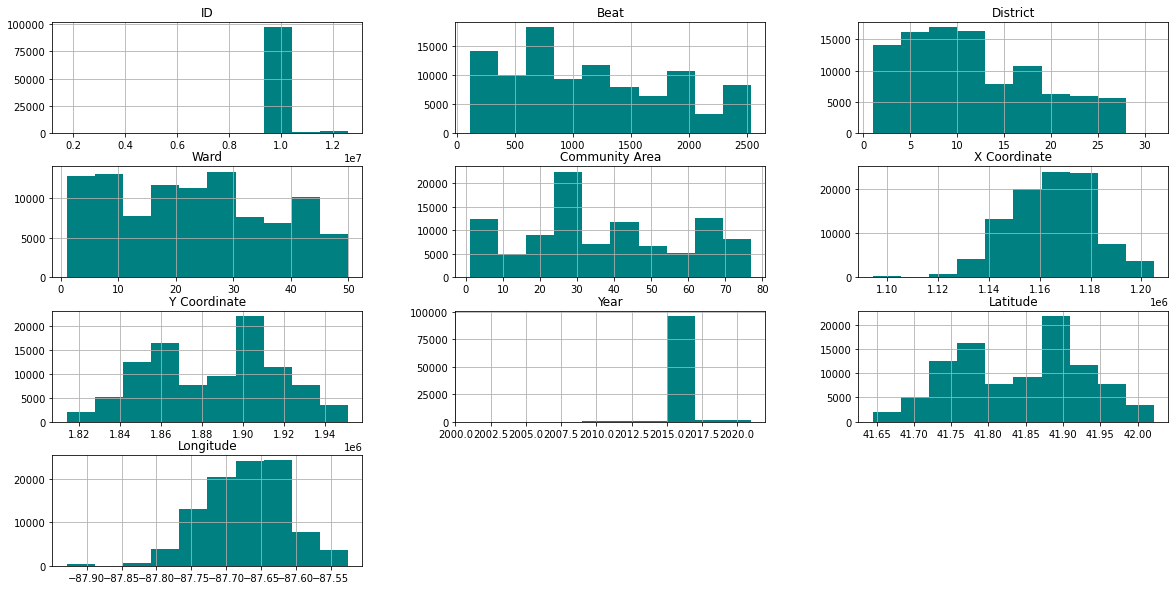

In [8]:
Crimes_Data.hist(color='teal',figsize=(20,10))

1. There don't appear to be any obvious data quality issues.
2. We'll need to standardize the features because we'll have more numerical, but on different scales.

### Descriptive statistics of a Dataframe


In [9]:
Crimes_Data.describe()


,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,1.000000e+05,100000.000000,100000.000000,99996.000000,99996.000000,9.777100e+04,9.777100e+04,100000.000000,97771.000000,97771.000000
mean,1.028165e+07,1142.514720,11.196360,22.884495,37.360764,1.164596e+06,1.885791e+06,2015.056140,41.842206,-87.671518
std,2.585071e+05,693.497984,6.928772,13.906412,21.423351,1.635850e+04,3.112363e+04,0.661735,0.085599,0.059546
min,1.744168e+06,111.000000,1.000000,1.000000,1.000000,1.094231e+06,1.813910e+06,2001.000000,41.644604,-87.928909
25%,1.019593e+07,612.000000,6.000000,10.000000,23.000000,1.152702e+06,1.858866e+06,2015.000000,41.768112,-87.714685
50%,1.024927e+07,1023.000000,10.000000,23.000000,32.000000,1.166247e+06,1.891639e+06,2015.000000,41.858450,-87.665423
75%,1.029269e+07,1711.000000,17.000000,34.000000,56.000000,1.176405e+06,1.908586e+06,2015.000000,41.904903,-87.627930
max,1.260280e+07,2535.000000,31.000000,50.000000,77.000000,1.205111e+06,1.951507e+06,2021.000000,42.022548,-87.524615


### Replacing Nan Values with 0 and changing the datatypes to "Integer"

In [10]:
Crimes_Data["Ward"].unique()

array([12., 29.,  8., 35., 28., 21., 32., 25., 27., 15., 13., 45., 34.,
        4.,  1., 10., 38.,  5.,  7.,  2., 20., 39., 24., 40.,  6., 37.,
       16.,  3., 42., 46., 23.,  9., 19., 50., 44., 47., 11., 48., 49.,
       26., 33., 22., 30., 18., 43., 31., 36., 17., 14., 41., nan])

In [11]:
Crimes_Data["Ward"]= Crimes_Data["Ward"].replace(np.nan, 0)

In [12]:
Crimes_Data["Ward"]= Crimes_Data["Ward"].astype(int)

In [13]:
Crimes_Data["Ward"].unique()

array([12, 29,  8, 35, 28, 21, 32, 25, 27, 15, 13, 45, 34,  4,  1, 10, 38,
        5,  7,  2, 20, 39, 24, 40,  6, 37, 16,  3, 42, 46, 23,  9, 19, 50,
       44, 47, 11, 48, 49, 26, 33, 22, 30, 18, 43, 31, 36, 17, 14, 41,  0])

In [14]:
Crimes_Data["Community Area"].unique()

array([61., 25., 44., 21., 71., 24., 31., 27., 63., 65., 11., 49., 39.,
       51., 15., 52., 12., 43., 46., 32., 68., 14., 29.,  2., 69., 23.,
       35.,  8.,  3.,  6., 56., 28., 53., 50., 33., 13., 74., 19., 45.,
       72., 22., 64.,  7.,  5., 26., 66., 59., 77.,  1., 10., 67., 38.,
       41., 60., 30., 54., 58., 48., 73., 70., 40., 34., 16., 18.,  4.,
       17., 42., 37., 75., 62., 20., 57., 76., 47., nan,  9., 36., 55.])

In [15]:
Crimes_Data["Community Area"]= Crimes_Data["Community Area"].replace(np.nan, 0)
Crimes_Data["Community Area"]= Crimes_Data["Community Area"].astype(int)

In [16]:
Crimes_Data["Community Area"].unique()

array([61, 25, 44, 21, 71, 24, 31, 27, 63, 65, 11, 49, 39, 51, 15, 52, 12,
       43, 46, 32, 68, 14, 29,  2, 69, 23, 35,  8,  3,  6, 56, 28, 53, 50,
       33, 13, 74, 19, 45, 72, 22, 64,  7,  5, 26, 66, 59, 77,  1, 10, 67,
       38, 41, 60, 30, 54, 58, 48, 73, 70, 40, 34, 16, 18,  4, 17, 42, 37,
       75, 62, 20, 57, 76, 47,  0,  9, 36, 55])

In [17]:
Crimes_Data["X Coordinate"].unique()

array([1165074., 1138875.,      nan, ..., 1140804., 1129717., 1158698.])

### Missing Values

In [18]:
Crimes_Data.isnull().sum()

ID                         0
Case Number                0
Date                       0
Block                      0
IUCR                       0
Primary Type               0
Description                0
Location Description     271
Arrest                     0
Domestic                   0
Beat                       0
District                   0
Ward                       0
Community Area             0
FBI Code                   0
X Coordinate            2229
Y Coordinate            2229
Year                       0
Updated On                 0
Latitude                2229
Longitude               2229
Location                2229
dtype: int64

### Frequency of Null Values

In [19]:
Frequency=Crimes_Data.isna().sum()/(len(Crimes_Data))*100
Frequency

ID                      0.000
Case Number             0.000
Date                    0.000
Block                   0.000
IUCR                    0.000
Primary Type            0.000
Description             0.000
Location Description    0.271
Arrest                  0.000
Domestic                0.000
Beat                    0.000
District                0.000
Ward                    0.000
Community Area          0.000
FBI Code                0.000
X Coordinate            2.229
Y Coordinate            2.229
Year                    0.000
Updated On              0.000
Latitude                2.229
Longitude               2.229
Location                2.229
dtype: float64

### Heat map for Null Values

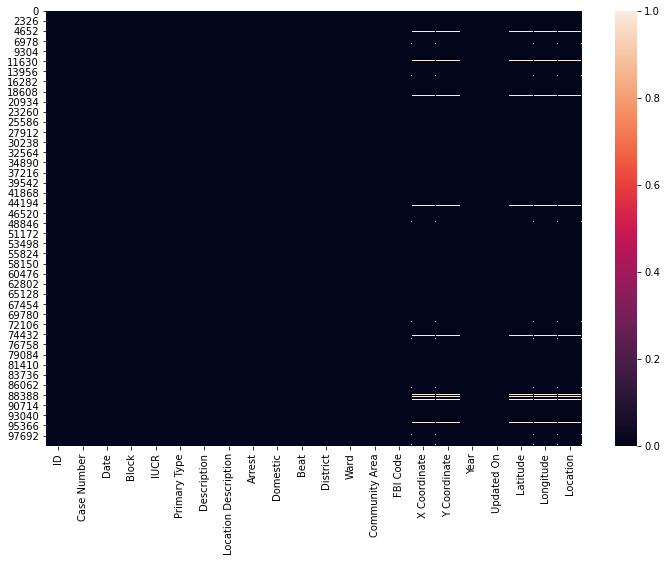

In [20]:
plt.figure(figsize=(12,8))
sns.heatmap(Crimes_Data.isna())
plt.show()

In [21]:
Crimes_Data["X Coordinate"] = Crimes_Data["X Coordinate"].fillna(value = 0.0)
Crimes_Data["Y Coordinate"] = Crimes_Data["Y Coordinate"].fillna(value = 0.0)
Crimes_Data["Latitude"] = Crimes_Data["Latitude"].fillna(value = 0.0)
Crimes_Data["Longitude"] = Crimes_Data["Longitude"].fillna(value = 0.0)
Crimes_Data["Location"] = Crimes_Data["Location"].fillna(value = 0.0)

In [22]:
Crimes_Data.isnull().sum()

ID                        0
Case Number               0
Date                      0
Block                     0
IUCR                      0
Primary Type              0
Description               0
Location Description    271
Arrest                    0
Domestic                  0
Beat                      0
District                  0
Ward                      0
Community Area            0
FBI Code                  0
X Coordinate              0
Y Coordinate              0
Year                      0
Updated On                0
Latitude                  0
Longitude                 0
Location                  0
dtype: int64

In [23]:
Crimes_Data.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [24]:
Crimes_Data.isnull().sum()

ID                        0
Case Number               0
Date                      0
Block                     0
IUCR                      0
Primary Type              0
Description               0
Location Description    271
Arrest                    0
Domestic                  0
Beat                      0
District                  0
Ward                      0
Community Area            0
FBI Code                  0
X Coordinate              0
Y Coordinate              0
Year                      0
Updated On                0
Latitude                  0
Longitude                 0
Location                  0
dtype: int64

### Changing data types


In [25]:
Crimes_Data.dtypes

ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                  int64
Ward                      int32
Community Area            int32
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

In [26]:
Crimes_Data["X Coordinate"].unique()

array([1165074., 1138875.,       0., ..., 1140804., 1129717., 1158698.])

In [27]:
Crimes_Data["X Coordinate"]= Crimes_Data["X Coordinate"].astype(int)

In [28]:
Crimes_Data["X Coordinate"].unique()

array([1165074, 1138875,       0, ..., 1140804, 1129717, 1158698])

In [29]:
Crimes_Data["Y Coordinate"].unique()


array([1875917., 1904869.,       0., ..., 1944717., 1927321., 1898481.])

In [30]:
Crimes_Data["Y Coordinate"]= Crimes_Data["Y Coordinate"].astype(int)

In [31]:
Crimes_Data["X Coordinate"].unique()

array([1165074, 1138875,       0, ..., 1140804, 1129717, 1158698])

In [32]:
Crimes_Data.dtypes

ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                  int64
Ward                      int32
Community Area            int32
FBI Code                 object
X Coordinate              int32
Y Coordinate              int32
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

### Split timestamps into usable components


In [33]:
Crimes_Data.Date=pd.to_datetime(Crimes_Data.Date,format='%m/%d/%Y %I:%M:%S %p')
Crimes_Data.index=pd.DatetimeIndex(Crimes_Data.Date)

In [34]:
Crimes_Data['Day'] = pd.DatetimeIndex(Crimes_Data['Date']).day
Crimes_Data['Month'] = pd.DatetimeIndex(Crimes_Data['Date']).month
Crimes_Data['Time'] = pd.to_datetime(Crimes_Data['Date']).dt.time

In [35]:
Crimes_Data.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location', 'Day', 'Month', 'Time'],
      dtype='object')

In [36]:
Crimes_Data.dtypes

ID                               int64
Case Number                     object
Date                    datetime64[ns]
Block                           object
IUCR                            object
Primary Type                    object
Description                     object
Location Description            object
Arrest                            bool
Domestic                          bool
Beat                             int64
District                         int64
Ward                             int32
Community Area                   int32
FBI Code                        object
X Coordinate                     int32
Y Coordinate                     int32
Year                             int64
Updated On                      object
Latitude                       float64
Longitude                      float64
Location                        object
Day                              int64
Month                            int64
Time                            object
dtype: object

In [37]:
Crimes_Data.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Day,Month,Time
Date,,,,,,,,,,,,,,,,,,,,,
2015-09-05 13:30:00,10224738,HY411648,2015-09-05 13:30:00,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,1165074,1875917,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)",5,9,13:30:00
2015-09-04 11:30:00,10224739,HY411615,2015-09-04 11:30:00,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,...,1138875,1904869,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)",4,9,11:30:00
2018-09-01 00:01:00,11646166,JC213529,2018-09-01 00:01:00,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,0,0,2018,04/06/2019 04:04:43 PM,0.000000,0.000000,0.0,1,9,00:01:00
2015-09-05 12:45:00,10224740,HY411595,2015-09-05 12:45:00,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,...,1152037,1920384,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)",5,9,12:45:00
2015-09-05 13:00:00,10224741,HY411610,2015-09-05 13:00:00,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,...,1141706,1900086,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)",5,9,13:00:00


### Histogram plot after cleaning the data

array([[<AxesSubplot:title={'center':'ID'}>,
        <AxesSubplot:title={'center':'Date'}>,
        <AxesSubplot:title={'center':'Beat'}>,
        <AxesSubplot:title={'center':'District'}>],
       [<AxesSubplot:title={'center':'Ward'}>,
        <AxesSubplot:title={'center':'Community Area'}>,
        <AxesSubplot:title={'center':'X Coordinate'}>,
        <AxesSubplot:title={'center':'Y Coordinate'}>],
       [<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Latitude'}>,
        <AxesSubplot:title={'center':'Longitude'}>,
        <AxesSubplot:title={'center':'Day'}>],
       [<AxesSubplot:title={'center':'Month'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

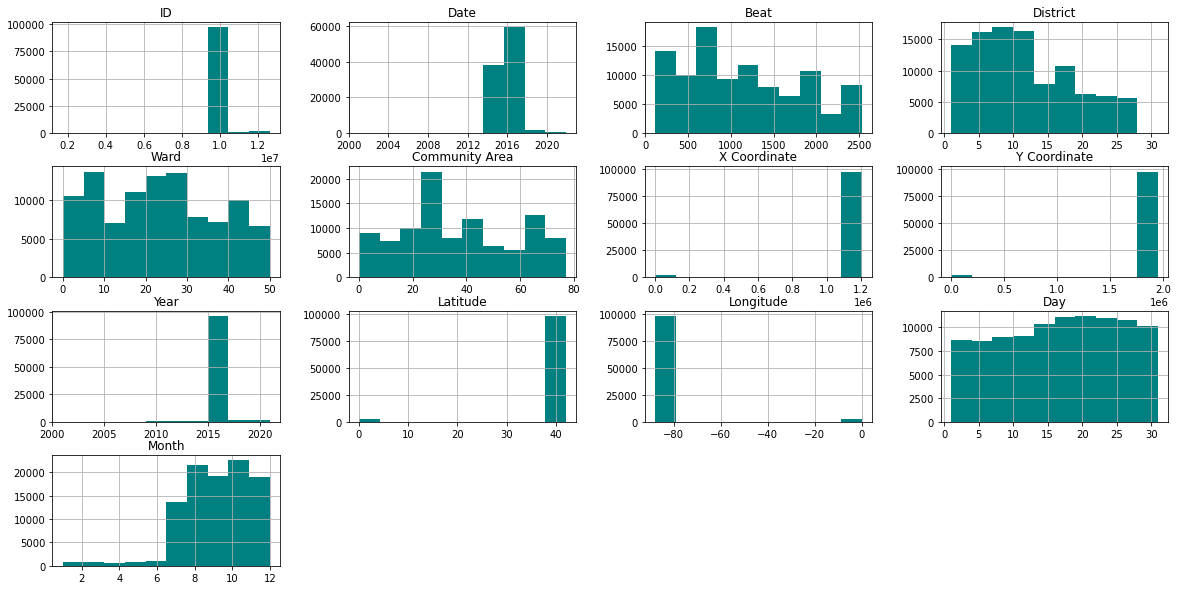

In [38]:
Crimes_Data.hist(color='teal',figsize=(20,10))

### Primary Type unique value counts

<AxesSubplot:>

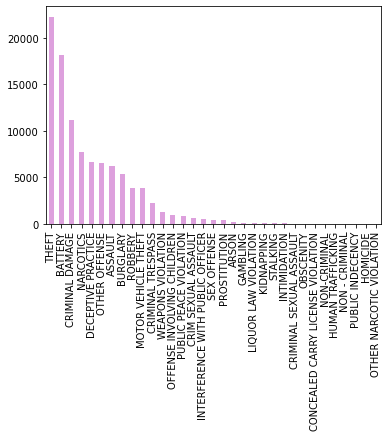

In [39]:
Crimes_Data["Primary Type"].value_counts().plot(kind='bar',color='plum')

### Top ten crimes 

In [40]:
Top_10_Crimes =  Crimes_Data['Primary Type'].value_counts().sort_values(ascending=False).head(10)
print(Top_10_Crimes)

THEFT                  22272
BATTERY                18133
CRIMINAL DAMAGE        11176
NARCOTICS               7731
DECEPTIVE PRACTICE      6700
OTHER OFFENSE           6588
ASSAULT                 6263
BURGLARY                5355
ROBBERY                 3913
MOTOR VEHICLE THEFT     3855
Name: Primary Type, dtype: int64


### Plotting top 10 crimes

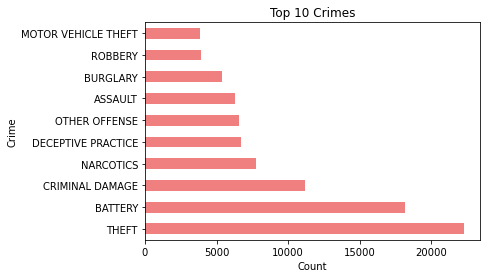

In [41]:
Top10Crimes = Crimes_Data.value_counts('Primary Type')[:10].\
    plot(kind = 'barh',\
         title = "Top 10 Crimes", color='lightcoral'
        )

Top10Crimes.set_xlabel("Count")
Top10Crimes.set_ylabel("Crime")
plt.show()


### Arrest unique value counts

<AxesSubplot:>

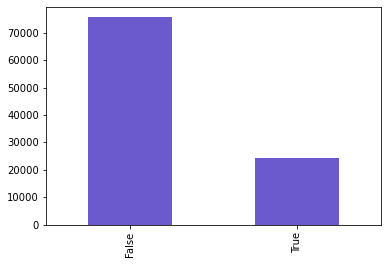

In [42]:
Crimes_Data.Arrest.value_counts().plot(kind='bar',color='slateblue')

### People arrested in different crimes

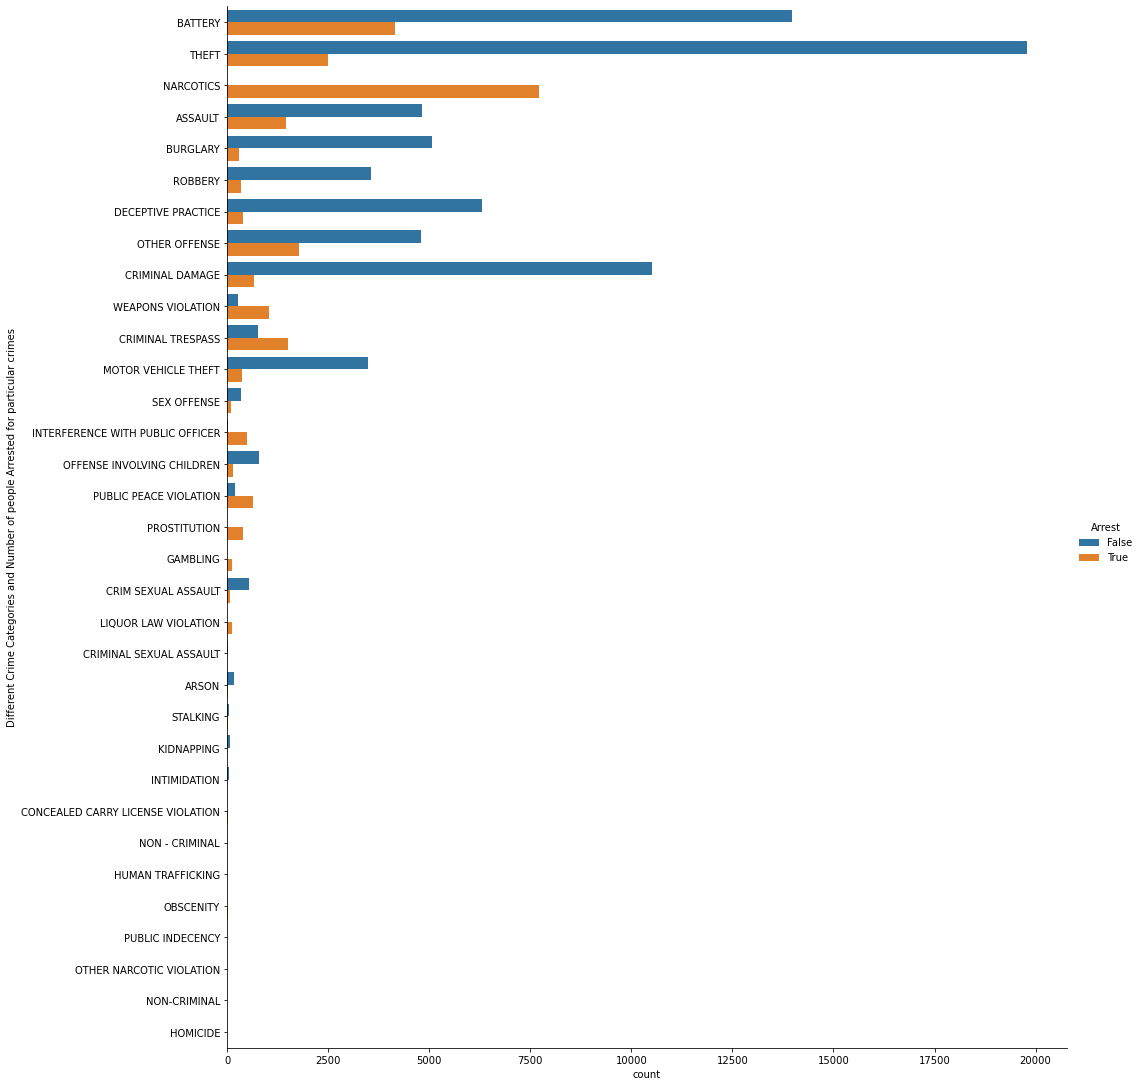

In [43]:
Arrested_Data = sns.factorplot(y="Primary Type", hue="Arrest", kind="count",
                   data=Crimes_Data,size=15)
Arrested_Data.set_ylabels("Different Crime Categories and Number of people Arrested for particular crimes") 

### The aggregation of the arrest count

In [44]:
Arrested=Crimes_Data.groupby('Arrest')['Arrest'].agg('count').sort_values(ascending=False)
Arrested

Arrest
False    75593
True     24407
Name: Arrest, dtype: int64

### Crimes per district

Text(0.5, 1.0, 'Crime per police district ')

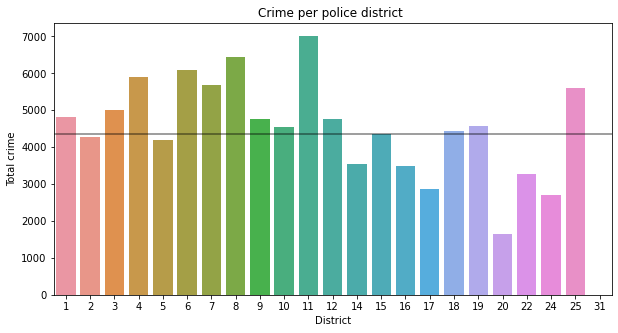

In [45]:
plt.figure(figsize=(10,5))
sns.countplot(x = Crimes_Data['District'])
plt.axhline(Crimes_Data['District'].value_counts().mean(), color = 'black', alpha = 0.5)
plt.xlabel('District')
plt.ylabel('Total crime')
plt.title('Crime per police district ')

### Number of crimes per month in a year

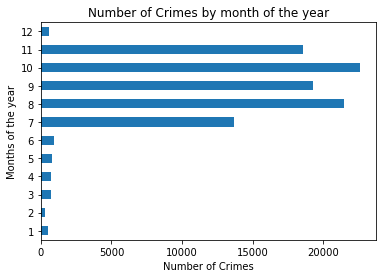

In [46]:
Crimes_Data.groupby([Crimes_Data.index.month]).size().plot(kind='barh')
plt.ylabel('Months of the year')
plt.xlabel('Number of Crimes')
plt.title('Number of Crimes by month of the year')
plt.show()

### Number of crimes by location

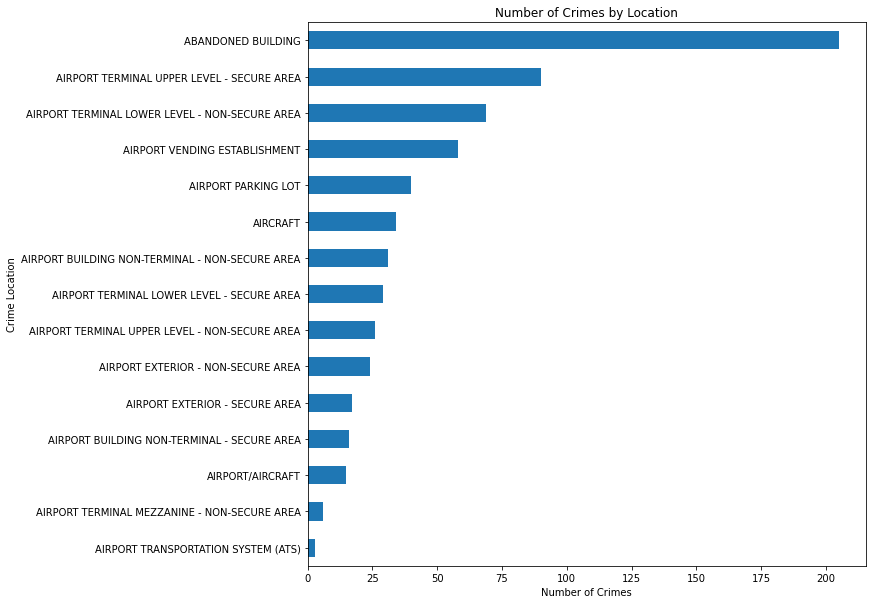

In [47]:
plt.figure(figsize=(10,10))
Crimes_Data.groupby([Crimes_Data['Location Description']]).size()[:15].sort_values(ascending=True).plot(kind='barh')
plt.title('Number of Crimes by Location')
plt.ylabel('Crime Location')
plt.xlabel('Number of Crimes')
plt.show()

### Number of criminals arrested using pieplot in percentages

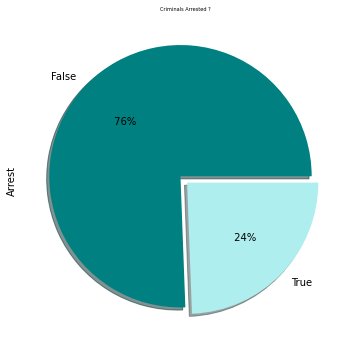

In [48]:
Arrested.plot(kind='pie',figsize=(5,5),autopct="%3.0f%%",colors=['teal','paleturquoise'],shadow=True,fontsize=10,explode=[0.05,.02])

plt.title('Criminals Arrested ?',fontsize=5)

plt.tight_layout()

### Distribution of crimes by community area

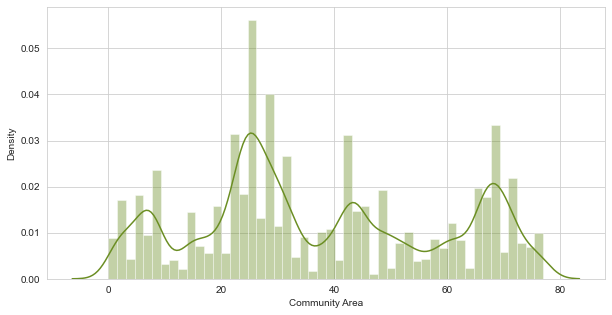

In [49]:
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
sns.distplot(Crimes_Data["Community Area"], color='olivedrab')
plt.show()

### Distribution of crimes by Accidents occured

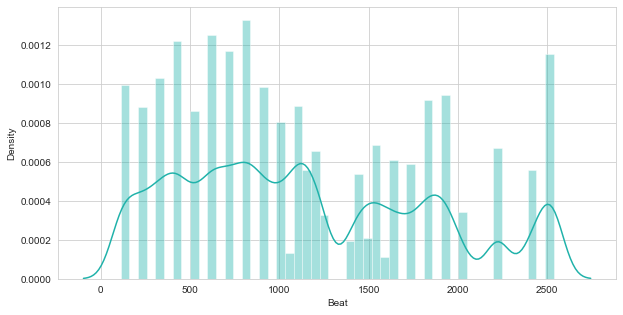

In [50]:
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
sns.distplot(Crimes_Data["Beat"],color='lightseagreen')
plt.show()

 Here if we observe the distribution higher in between the 500 to 1000

In [51]:
Crimes_Data.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Day,Month,Time
Date,,,,,,,,,,,,,,,,,,,,,
2015-09-05 13:30:00,10224738,HY411648,2015-09-05 13:30:00,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,1165074,1875917,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)",5,9,13:30:00
2015-09-04 11:30:00,10224739,HY411615,2015-09-04 11:30:00,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,...,1138875,1904869,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)",4,9,11:30:00
2018-09-01 00:01:00,11646166,JC213529,2018-09-01 00:01:00,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,0,0,2018,04/06/2019 04:04:43 PM,0.000000,0.000000,0.0,1,9,00:01:00
2015-09-05 12:45:00,10224740,HY411595,2015-09-05 12:45:00,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,...,1152037,1920384,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)",5,9,12:45:00
2015-09-05 13:00:00,10224741,HY411610,2015-09-05 13:00:00,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,...,1141706,1900086,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)",5,9,13:00:00


### Correlation of the Dataframe

<AxesSubplot:>

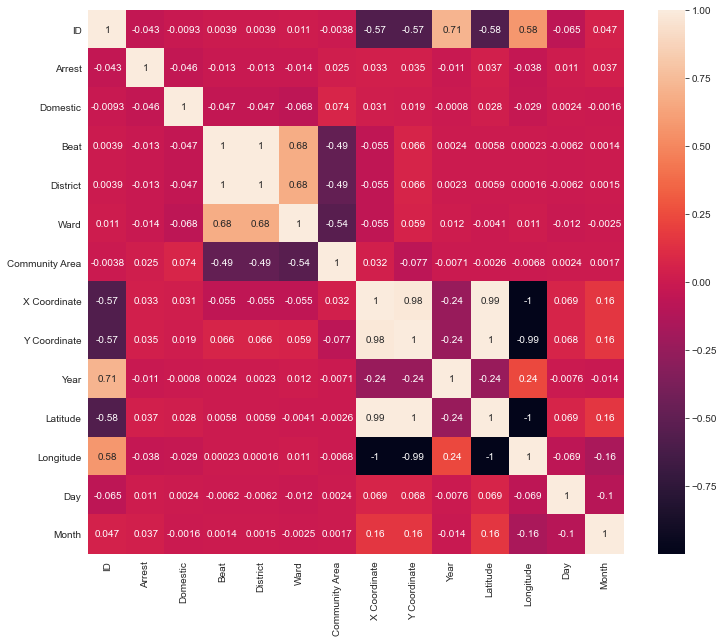

In [52]:
plt.figure(figsize=(12,10))
sns.heatmap(Crimes_Data.corr(),annot=True)

In [53]:
Crimes_Data.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location', 'Day', 'Month', 'Time'],
      dtype='object')